<a href="https://colab.research.google.com/github/Je-Hyeon/Je-Hyeon/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATPLOTLIB

* savefig을 사용해서 파일로 저장가능

* hist에서 density를 주면 발생빈도(소수)를 보여준다.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plot 기본

Text(0, 0.5, 'Root x')

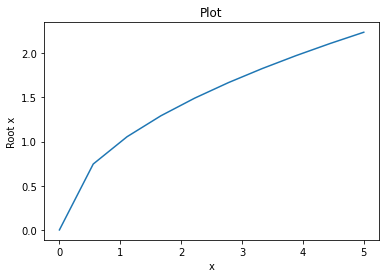

In [3]:
x_1 = np.linspace(0,5, num=10)
x_2 = np.sqrt(x_1)

plt.plot(x_1 , x_2)
plt.title('Plot')
plt.xlabel('x')
plt.ylabel('Root x')

# Subplot 기본

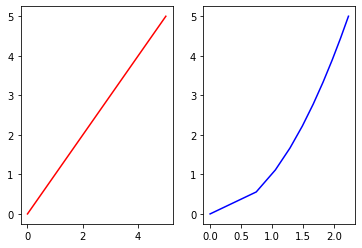

In [5]:
# subplot(행, 열, 위치)

plt.subplot(1,2,1)
plt.plot(x_1, x_1, 'r')

plt.subplot(1,2,2)
plt.plot(x_2, x_1, 'b')

# Figure 객체 사용

fig는 하나의 그림이미지 전부를 의미하는 것 같다.(흰색 바탕 전부) 그 안에 들어오는 차트를 axes라고 부르는 듯.

Text(0.5, 0, 'X')

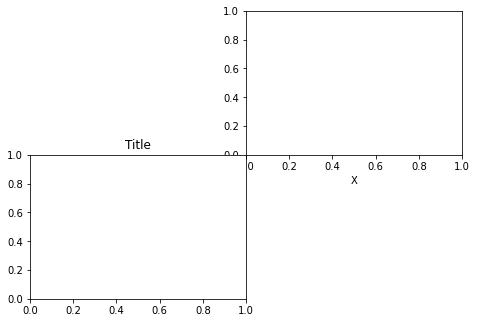

In [37]:
fig = plt.figure()

# Adds axes with a left, bottom, width and height that ranges from 0 to 1
# which is the percent of the canvas you want to use

axes1 = fig.add_axes([1,1, 0.5,0.5])   # -> 뒤에 두 숫자는 그래프의 사이즈를 말하는게 확실한 것 같다.
axes2 = fig.add_axes([0.5, 0.5, 0.5, 0.5])

plt.title('Title')
axes1.set_xlabel('X')

# plt로 접근할 때는 plt.title, plt.xlabel 이렇게 설정해 주고
# axes로 접근할 때는 set_title , set_xlabel 이렇게 설정해 준다.

# Subplots ( subplot과 다름)

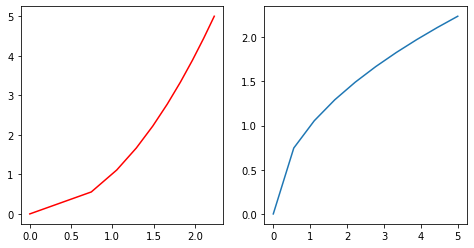

In [59]:
# subplots을 사용하면 fig와 axes두가지 객체로 받아주어야 한다.
## axes는 axes들의 리스트를 담고 있다고 생각하면 편하다

fig, axes_list = plt.subplots(figsize=(8,4), nrows=1, ncols=2)


axes_list[0].plot(x_2,x_1, 'r')
axes_list[1].plot(x_1,x_2)

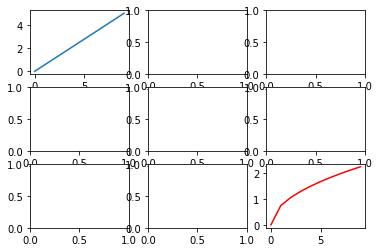

In [61]:
# 넘파이 인덱싱에 접근하는 것 처럼 차트에 접근해야 한다.

fig, axes_list = plt.subplots(3,3)   # -> 3*3개의 차트를 만든다.

axes_list[0,0].plot(x_1)
axes_list[2,2].plot(x_2 , 'r')

# 플롯의 여러 스타일 (줄, 그리드)

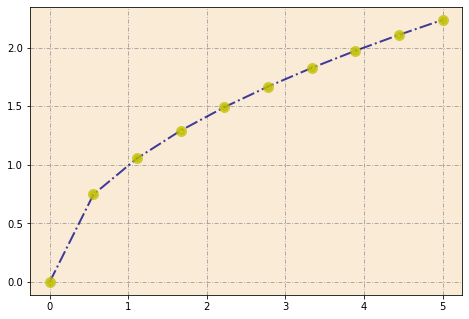

In [68]:
fig = plt.figure()
axes_3 = fig.add_axes([0,0,1,1])

axes_3.plot(x_1, x_2,color='navy', alpha=.75, lw=2, ls='-.',
           marker='o', markersize=7, markerfacecolor='y',
           markeredgecolor='y', markeredgewidth=4)
# color, alpha(불투명도) , lw 라인 넓이 , ls 라인 스타일, marker, markersize, markerfacecolor, etc...

# Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space) -> grid : 격자무늬
axes_3.grid(True, color='0.6', dashes=(5, 2, 1, 2))
# Set grid background color
axes_3.set_facecolor('#FAEBD7')

# 데이터프레임 형태 자료를 plot해보기


In [104]:
icecream = pd.read_csv('https://raw.githubusercontent.com/derekbanas/matplotlib/master/icecreamsales.csv')

icecream

# 온도와 판매량 그래프를 그려보고 싶다

,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [106]:
# 목적을 분명히 해야한다. 온도가 상승함에 따라서 판매량의 변화분을 보고 싶은 것이다.
##그럼, 온도에 따라서 값을 정렬해야한다. ->정렬안하고 그래프 그리면 이상한 그래프가 나온다.왜나면 x축 변수가 지멋대로 왓다갓다하기 때문.

ice_df = icecream.sort_values(by = 'Temperature')

<BarContainer object of 12 artists>

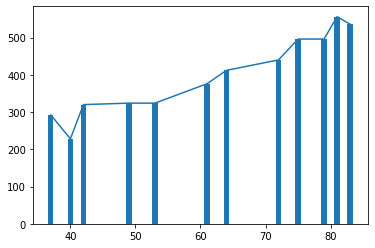

In [108]:
a = ice_df['Temperature']
b = ice_df['Sales']

plt.plot(a,b)
plt.bar(a,b)   # bar chart를 추가할 수 있다.

# Barchart

## yerr 사용하기

<BarContainer object of 7 artists>

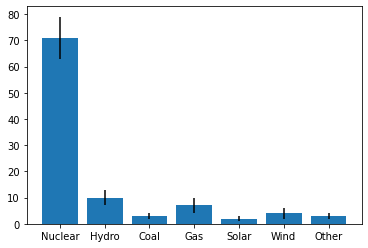

In [109]:
# 그냥 그리기. 새로운 개념은 yerr 이 등장!

x = ['Nuclear', 'Hydro', 'Coal', 'Gas', 'Solar', 'Wind', 'Other']
per_1 = [71, 10, 3, 7, 2, 4, 3]

variance = [8, 3, 1, 3, 1, 2, 1]

plt.bar(x, per_1 , yerr = variance )

# yerr이나 을 줘서 barchart의 error bar도 만들 수 있다. 플러스마이너스 오차를 표시할 수 있다.

## x축 값이 업는 BarChart

<BarContainer object of 5 artists>

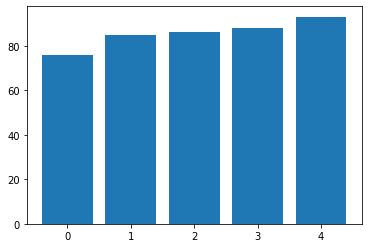

In [117]:
# 데이터가 만약 height만 가지는 형태라면?  -> plt.bar(m_eng) 하면 오류가 뜬다.
## barchart는 무조건 x와 height를 둘 다 주어줘야 한다.

m_eng = (76, 85, 86, 88, 93)
f_eng = (24, 15, 14, 12, 7)

ra = np.arange(5)  # -> 이렇게 x값으로 사용할 것을 만들어줘야 한다.

plt.bar(ra, m_eng, label='Male')

## Ticker 만들기 (xticks, yticks)

 y축 티커는 yticks 사용하면 될듯

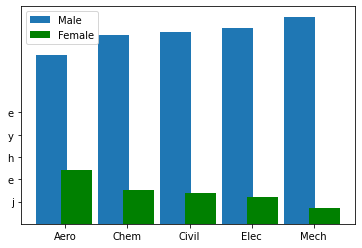

In [134]:
# 두개를 같이 나타나게 하기.. 더하기를 해서 남자차트 살짝 옆에 여자차트가 보이게 하면 된다.

plt.bar(ra, m_eng, width= 0.5 , label='Male')
plt.bar(ra+ 0.4, f_eng, width= 0.5, label = 'Female', color = 'g')
plt.legend()

# xticks를 사용해서 x 축에 티커를 줄 수 있다.
plt.xticks(ra + 0.45 / 2, ('Aero', 'Chem', 'Civil', 'Elec', 'Mech'))

# y축 티커 주기
plt.yticks([10,20,30,40,50] ,'jehyeon' );

## Stacked Barchart

* 잘 모르겠음 나중에 보자 -> enumerate 알아냈음

* 그냥 bottom만 주면된다. 어렵지 않다

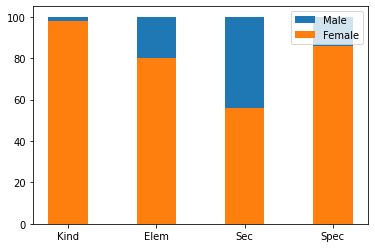

In [138]:
# Plot teachers by sex
t_type = ['Kind', 'Elem', 'Sec', 'Spec']
m_teach = np.array([2, 20, 44, 14])
f_teach = np.array([98, 80, 56, 86])

# x축 값이 없기 때문에 그것을 만드는 과정 -> 리스트 내포를 사용해서 한줄로 해결해버린다.
ind = [x for x, _ in enumerate(t_type)]    # enumerate는 리스트 위치와 해당 값을 튜플형태로 가져오는 것 같은데

# Plot stacked bars for men and then women under
plt.bar(ind, m_teach, width=0.45, label='Male', bottom=f_teach)   # -> 뭐가 bottom에 들어갈지 말해주면 되는 군...
plt.bar(ind, f_teach, width=0.45, label='Female')                 # bottom을 안주면 그냥 두 그래프가 똑같은 위치에 겹쳐서 출력된다.

plt.legend()

# 당연히 x축 티커도 한번 만들어 보자.
plt.xticks(ind, t_type);